<p><img style="float: right;margin:10px 30px 10px 5px; max-width:250px" src="https://assets-global.website-files.com/6411d7ea6675ddf353405625/64130fe6f398e323331bfe3a_Logo%20green%20full.svg"</p>

## CAPSTONE PROJECT- MAY 2024

### _DATA ANALYSIS IN PYHTON ON NORTHWIND DATABASE_

* CUSTOMER ANALYSIS-RFM ANALYSIS AND CUSTOMER SEGMENTATION;

* SALESPERSON/EMPLOYEE ANALYSIS - SALES PERFORMANCE ANALYSIS

In [1]:
# CUSTOMER ANALYSIS

##### CUSTOMER SEGMENTATION SQL CODES

     WITH RC AS
	(SELECT O.CUSTOMER_ID,C.COMPANY_NAME,MIN('1998.05.06' - O.ORDER_DATE::date)AS RECENCY_VALUE
		FROM ORDERS O
		INNER JOIN CUSTOMERS C ON C.CUSTOMER_ID = O.CUSTOMER_ID
		GROUP BY 1,2
		ORDER BY 2),
	FR AS
	(SELECT O.CUSTOMER_ID,COUNT(ORDER_ID)AS FREQUENCY_VALUE
		FROM ORDERS O
		INNER JOIN CUSTOMERS C ON C.CUSTOMER_ID = O.CUSTOMER_ID
		GROUP BY 1
		ORDER BY 2),
	MON AS
	(SELECT O.CUSTOMER_ID,ROUND(SUM(OD.UNIT_PRICE * OD.QUANTITY)::NUMERIC,0) AS MONETARY_VALUE
		FROM ORDERS O
		INNER JOIN CUSTOMERS C ON C.CUSTOMER_ID = O.CUSTOMER_ID
		INNER JOIN ORDER_DETAILS OD ON OD.ORDER_ID = O.ORDER_ID
		GROUP BY 1
		ORDER BY 2),
    RFM AS(
    SELECT RC.CUSTOMER_ID,RC.COMPANY_NAME,
	RC.RECENCY_VALUE,
	FR.FREQUENCY_VALUE,
	MON.MONETARY_VALUE,
	NTILE(5) OVER(ORDER BY RECENCY_VALUE DESC) AS RECENCY_SCORE,
	NTILE(5) OVER(ORDER BY FREQUENCY_VALUE) AS FREQUENCY_SCORE,
	NTILE(5) OVER(ORDER BY MONETARY_VALUE) AS MONETARY_SCORE
    FROM RC
    INNER JOIN FR ON RC.CUSTOMER_ID = FR.CUSTOMER_ID
    INNER JOIN MON ON RC.CUSTOMER_ID = MON.CUSTOMER_ID
    ORDER BY 1)

    SELECT CUSTOMER_ID,COMPANY_NAME,
	RECENCY_SCORE || '--' || FREQUENCY_SCORE || '--' || MONETARY_SCORE AS CUSTOMER_RFM_SCORE,
	CASE
					WHEN RECENCY_SCORE = 5 AND FREQUENCY_SCORE IN (4,5) THEN 'Champions'
					WHEN RECENCY_SCORE IN (3,4) AND FREQUENCY_SCORE IN (4,5) THEN 'Loyal Customers'
					WHEN RECENCY_SCORE IN (1,2) AND FREQUENCY_SCORE = 5 THEN 'Cant Lose Them'
					WHEN RECENCY_SCORE IN (1,2)AND FREQUENCY_SCORE IN(3,4) THEN 'At Risk'
					WHEN RECENCY_SCORE IN (4,5)AND FREQUENCY_SCORE IN (2,3) THEN 'Potential Loyalist'
					WHEN RECENCY_SCORE = 3 AND FREQUENCY_SCORE = 3 THEN 'Need Attention'
					WHEN RECENCY_SCORE = 3 AND FREQUENCY_SCORE IN (1,2) THEN 'About to Sleep'
					WHEN RECENCY_SCORE IN (1,2) AND FREQUENCY_SCORE IN (1,2) THEN 'Hibernating'
					WHEN RECENCY_SCORE = 4 AND FREQUENCY_SCORE = 1 THEN 'Promising'
					WHEN RECENCY_SCORE = 5	AND FREQUENCY_SCORE = 1 THEN 'New Costumer'
	END AS CUSTOMER_SEGMENT
    FROM RFM
    ORDER BY 2 DESC


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# FutureWarning'leri kapatma
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df=pd.read_csv("E:/05 Kodlasam-Berna- VAM11/kodlasam/Bitirme Projesi-2024/1-NORTHWIND/pyhton_analizi/pyhton_rfm_analizi_musteri_segmentasyonu.csv")

In [5]:
df

,customer_segment,count,segment_percent
0,Hibernating,23,%25
1,Loyal Customers,17,%19
2,At Risk,12,%13
3,Champions,12,%13
4,Potential Loyalist,11,%12
5,Need Attention,5,%5
6,About to Sleep,5,%5
7,Promising,3,%3
8,Cant Lose Them,1,%1


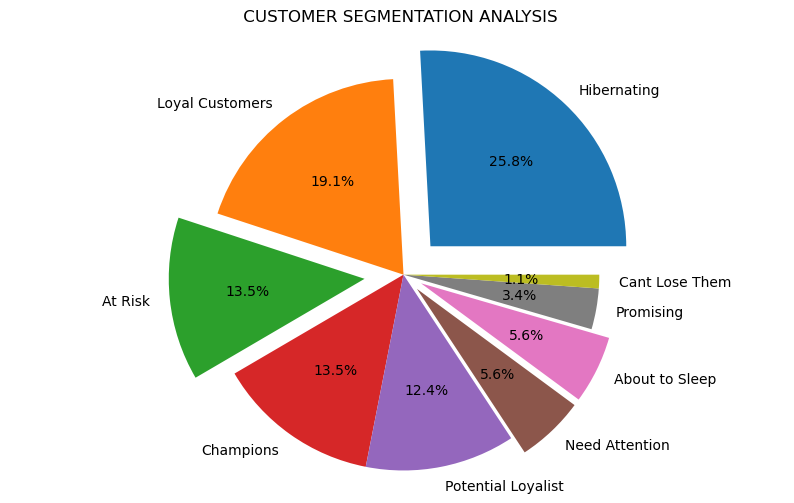

In [6]:
plt.figure(figsize=(10, 6))
plt.pie(df['count'], labels=df['customer_segment'], autopct='%1.1f%%',explode = (0.2, 0, 0.2, 0.0, 0.0, 0.1, 0.1, 0, 0))
plt.title(' CUSTOMER SEGMENTATION ANALYSIS')
plt.axis('equal') 
plt.show()

#Comment:

"Potential Loyalist" and "At Risk" segments are the segments to focus on as they have growth potential. In order to expand the customer base, it is necessary to convert potential loyal customers into loyal customers and to retain and regain these at-risk customers.

When we consider these groups and other segments, special offers, discounts and incentive programs can be handled separately according to customer segments.

In addition to these special offers, it may be good to offer special customer relations, VIP programs for customers who should not be lost, and rewards for loyal customers.

In [65]:
#EMPLOYEE ANALYSIS

##### EMPLOYEE ANALYSIS SQL KODLARI

    SELECT E.FIRST_NAME || ' ' || E.LAST_NAME AS EMPLOYEE_NAMES,
	E.TITLE AS EMPLOYEE_TITLE,
	COUNT(DISTINCT OD.ORDER_ID) AS TOTAL_NUMBER_ORDERS,
	COUNT(OD.*) AS TOTAL_NUMBER_ENTRIES,
	ROUND(SUM(OD.UNIT_PRICE * QUANTITY)::NUMERIC,0) AS EARN
    FROM ORDERS AS O
    INNER JOIN EMPLOYEES AS E ON O.EMPLOYEE_ID = E.EMPLOYEE_ID
    INNER JOIN ORDER_DETAILS AS OD ON OD.ORDER_ID = O.ORDER_ID
    INNER JOIN PRODUCTS AS P ON OD.PRODUCT_ID = P.PRODUCT_ID
    GROUP BY EMPLOYEE_NAMES,
	EMPLOYEE_TITLE
    ORDER BY EARN DESC

In [9]:
df2=pd.read_csv("E:/05 Kodlasam-Berna- VAM11/kodlasam/Bitirme Projesi-2024/1-NORTHWIND/pyhton_analizi/pyhton_calisan_satis_performansi.csv")

In [10]:
df2

,employee_names,employee_title,total_number_orders,total_number_entries,earn
0,Margaret Peacock,Sales Representative,156,420,250187
1,Janet Leverling,Sales Representative,127,321,213051
2,Nancy Davolio,Sales Representative,123,345,202144
3,Andrew Fuller,"Vice President, Sales",96,241,177749
4,Robert King,Sales Representative,72,176,141296
5,Laura Callahan,Inside Sales Coordinator,104,260,133301
6,Anne Dodsworth,Sales Representative,43,107,82964
7,Michael Suyama,Sales Representative,67,168,78198
8,Steven Buchanan,Sales Manager,42,117,75568


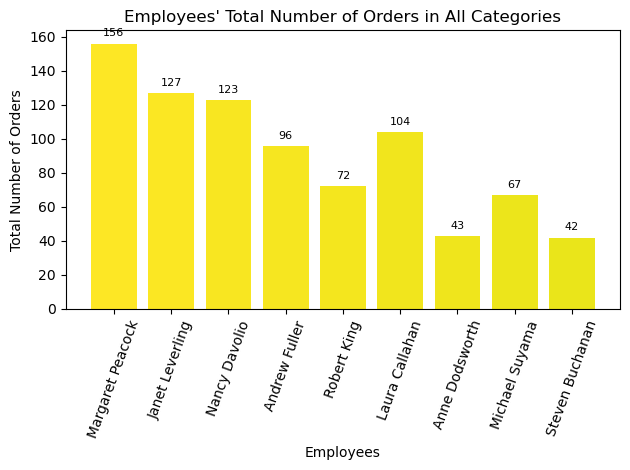

In [11]:
plt.bar(df2['employee_names'], df2['total_number_orders'], color=plt.cm.viridis_r(range(len(df2['employee_names']))))
plt.xlabel('Employees')
plt.ylabel('Total Number of Orders')
plt.title("Employees' Total Number of Orders in All Categories")

for i, v in enumerate(df2['total_number_orders']):
    plt.text(i, v + 3, str(v), ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

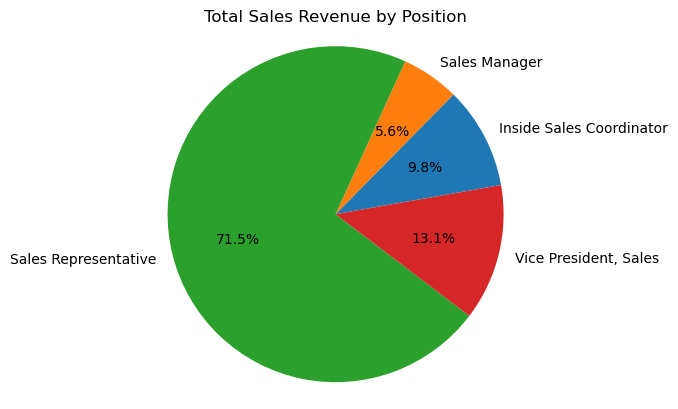

In [12]:
earnings_by_position = df2.groupby('employee_title')['earn'].sum()
plt.pie(earnings_by_position, labels=earnings_by_position.index, autopct='%1.1f%%', startangle=10)
plt.axis('equal') 
plt.title('Total Sales Revenue by Position')
plt.show()

In [13]:
df3=pd.read_csv("E:/05 Kodlasam-Berna- VAM11/kodlasam/Bitirme Projesi-2024/1-NORTHWIND/pyhton_analizi/pyhton_calisan_kategori_siparis_performansi.csv")

In [14]:
df3

,employee_names,category_name,total_number_orders,earn,total_quantity,top_employee
0,Nancy Davolio,Beverages,53,48832,1607,1
1,Margaret Peacock,Confections,63,29543,1535,1
2,Nancy Davolio,Dairy Products,51,38013,1525,1
3,Margaret Peacock,Seafood,61,29042,1505,1
4,Margaret Peacock,Condiments,41,25242,1252,1
5,Margaret Peacock,Grains/Cereals,43,23704,1000,1
6,Margaret Peacock,Meat/Poultry,31,34179,921,1
7,Anne Dodsworth,Dairy Products,23,22018,639,9
8,Margaret Peacock,Produce,24,18587,558,1
9,Steven Buchanan,Beverages,18,13518,421,9


##### EMPLOYEES ANALYSIS SQL CODES

    WITH TOP AS(
    WITH EMP AS
	(SELECT DISTINCT E.FIRST_NAME || ' ' || E.LAST_NAME AS EMPLOYEE_NAMES,
			E.TITLE AS EMPLOYEE_TITLE,
			CATEGORY_NAME,
			COUNT(DISTINCT OD.ORDER_ID) AS TOTAL_NUMBER_ORDERS,
			SUM(QUANTITY) AS TOTAL_QUANTITY,
			ROUND(SUM(OD.UNIT_PRICE * QUANTITY)::NUMERIC,0) AS EARN
		FROM ORDERS AS O
		INNER JOIN EMPLOYEES AS E ON O.EMPLOYEE_ID = E.EMPLOYEE_ID
		INNER JOIN ORDER_DETAILS AS OD ON OD.ORDER_ID = O.ORDER_ID
		INNER JOIN PRODUCTS AS P ON OD.PRODUCT_ID = P.PRODUCT_ID
		INNER JOIN CATEGORIES AS C ON C.CATEGORY_ID = P.CATEGORY_ID
		GROUP BY 1,2,3
		ORDER BY 1)
    SELECT EMPLOYEE_NAMES,
	CATEGORY_NAME,
	TOTAL_NUMBER_ORDERS,
	EARN,
	TOTAL_QUANTITY,
	DENSE_RANK() OVER (PARTITION BY CATEGORY_NAME ORDER BY TOTAL_QUANTITY DESC )AS TOP_EMPLOYEE
    FROM EMP
    ORDER BY 4 DESC)
    SELECT EMPLOYEE_NAMES,
	CATEGORY_NAME,
	TOTAL_NUMBER_ORDERS,
	EARN,
	TOTAL_QUANTITY,TOP_EMPLOYEE FROM TOP
    WHERE TOP_EMPLOYEE IN (1,9)
    ORDER BY 5 DESC

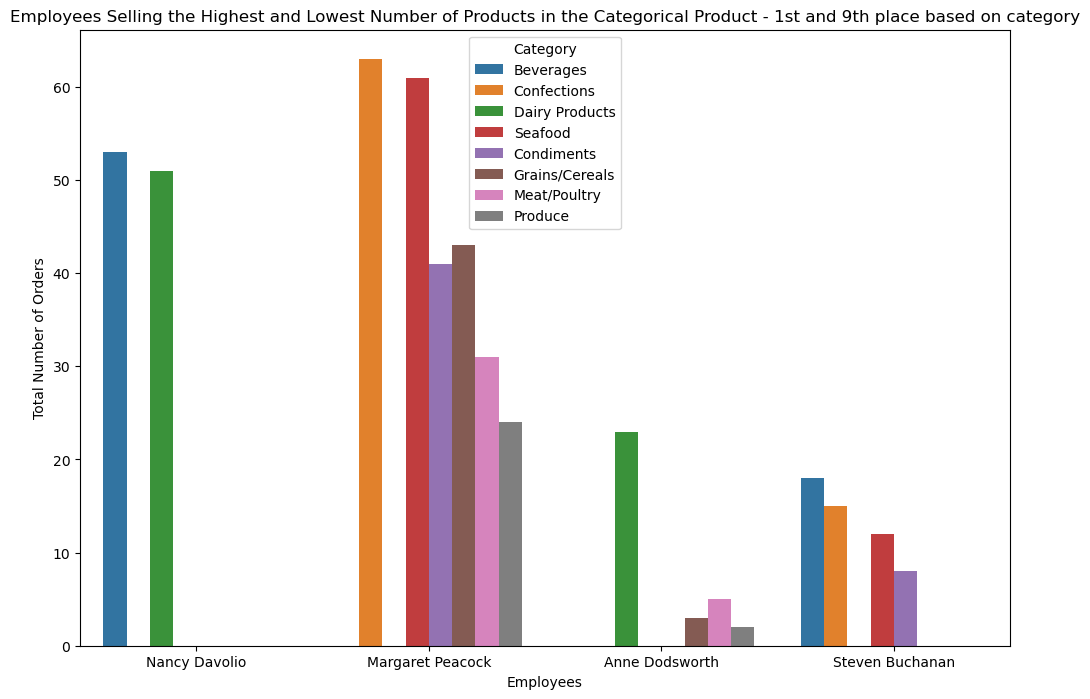

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='employee_names', y='total_number_orders', hue='category_name', data=df3)
plt.title('Employees Selling the Highest and Lowest Number of Products in the Categorical Product - 1st and 9th place based on category')
plt.ylabel('Total Number of Orders')
plt.xlabel('Employees')
plt.legend(title='Category')
plt.show()


My Comments and Recommendations:

According to the charts, Margaret is very good at selling products in 6 different categories. Nancy is also good especially in 2 categories. Janet, on the other hand, has sold products with high unit prices per category and has provided a good return to the company in general as the sales numbers are good.
Margaret, Nancy and Janet's performance is very high. 
In order to maintain the motivation of these successful sales performers 
career opportunities with bonuses, bonuses, financial rewards based on their performance. 

Unfortunately, Anne and Steven seem to be underperforming. 
In order to increase the sales performance of these employees, they can be supported with the trainings they need.
Performance analysis for all employees and monitoring of their processes with feedbacks 
it will be good for the growth of the company.